In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
pwd

'/Users/bingobango/code/multiyumz/developer-salaries-pred-model'

In [177]:
data = pd.read_csv('../../../Desktop/stack-overflow-developer-survey-2022/survey_results_public.csv')

In [178]:
data.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


# Cleaning Data

In [179]:
data = data[['Country', 'EdLevel', 'YearsCodePro', 'Employment', 'ConvertedCompYearly']]

In [180]:
data = data.rename({'ConvertedCompYearly': 'Salary'}, axis=1)

In [181]:
data['Salary'].isnull().sum()

35197

In [182]:
data.shape

(73268, 5)

In [183]:
data = data[data['Salary'].notnull()]

In [184]:
data.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",49056.0
10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",60307.0
11,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,"Employed, full-time;Independent contractor, fr...",194400.0


In [185]:
data['Employment'].unique()

array(['Employed, full-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Independent contractor, freelancer, or self-employed',
       'Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Employed, part-time', 'I prefer not to say',
       nan,
       'Independent contractor, freelancer, or self-employed;Retired',
       'Retired', 'Employed, part-time;Retired',
       'Employed, full-time;Retired',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Retired'],
      dtype=object)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38071 entries, 2 to 73121
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       38071 non-null  object 
 1   EdLevel       38054 non-null  object 
 2   YearsCodePro  37935 non-null  object 
 3   Employment    38067 non-null  object 
 4   Salary        38071 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.7+ MB


In [75]:
data.isnull().sum()

Country           0
EdLevel          17
YearsCodePro    136
Employment        4
Salary            0
dtype: int64

In [76]:
data = data.dropna()

In [77]:
data.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [78]:
data = data[data['Employment']=='Employed, full-time']
data = data.drop('Employment', axis=1)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31382 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       31382 non-null  object 
 1   EdLevel       31382 non-null  object 
 2   YearsCodePro  31382 non-null  object 
 3   Salary        31382 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [80]:
data['Country'].shape

(31382,)

In [81]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [82]:
country_map = shorten_categories(data.Country.value_counts(), 400)

In [83]:
data['Country'] = data['Country'].map(country_map)

In [84]:
data.Country.value_counts()

Other                                                   8643
United States of America                                7858
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
France                                                  1126
Brazil                                                  1014
Spain                                                    858
Netherlands                                              701
Australia                                                700
Italy                                                    667
Poland                                                   572
Sweden                                                   561
Russian Federation                                       425
Switzerland                                              416
Name: Country, dtype: in

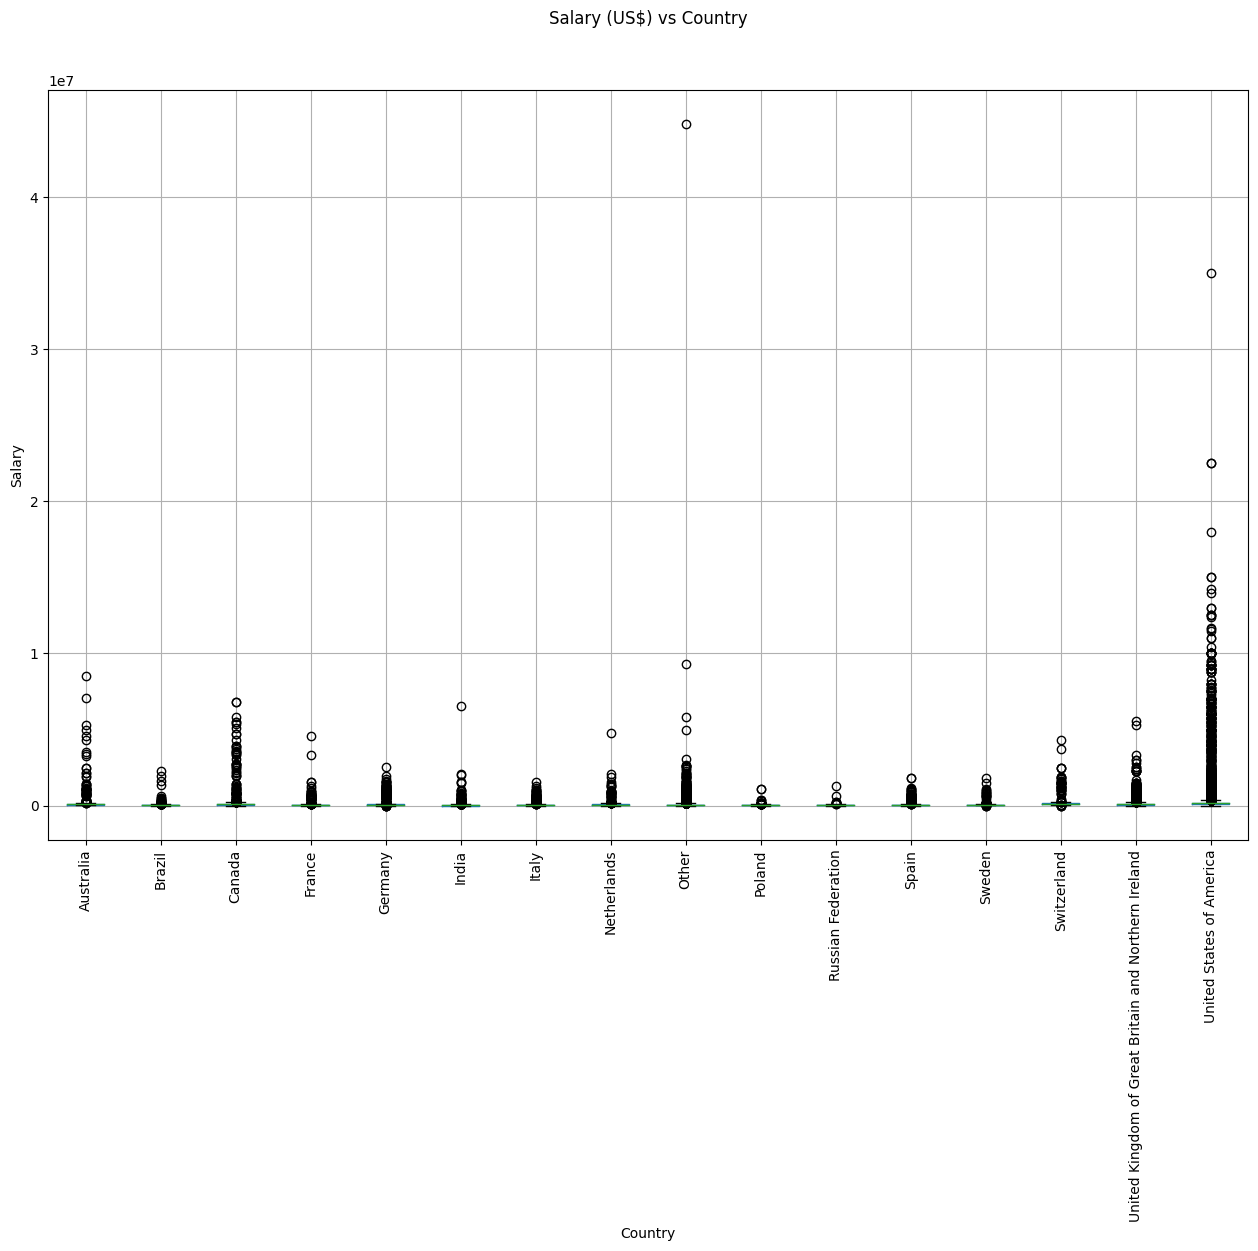

In [85]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
data.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [86]:
data = data[data['Salary'] <= 250000]
data = data[data['Salary'] >= 10000]
data = data[data['Country'] != 'Other']

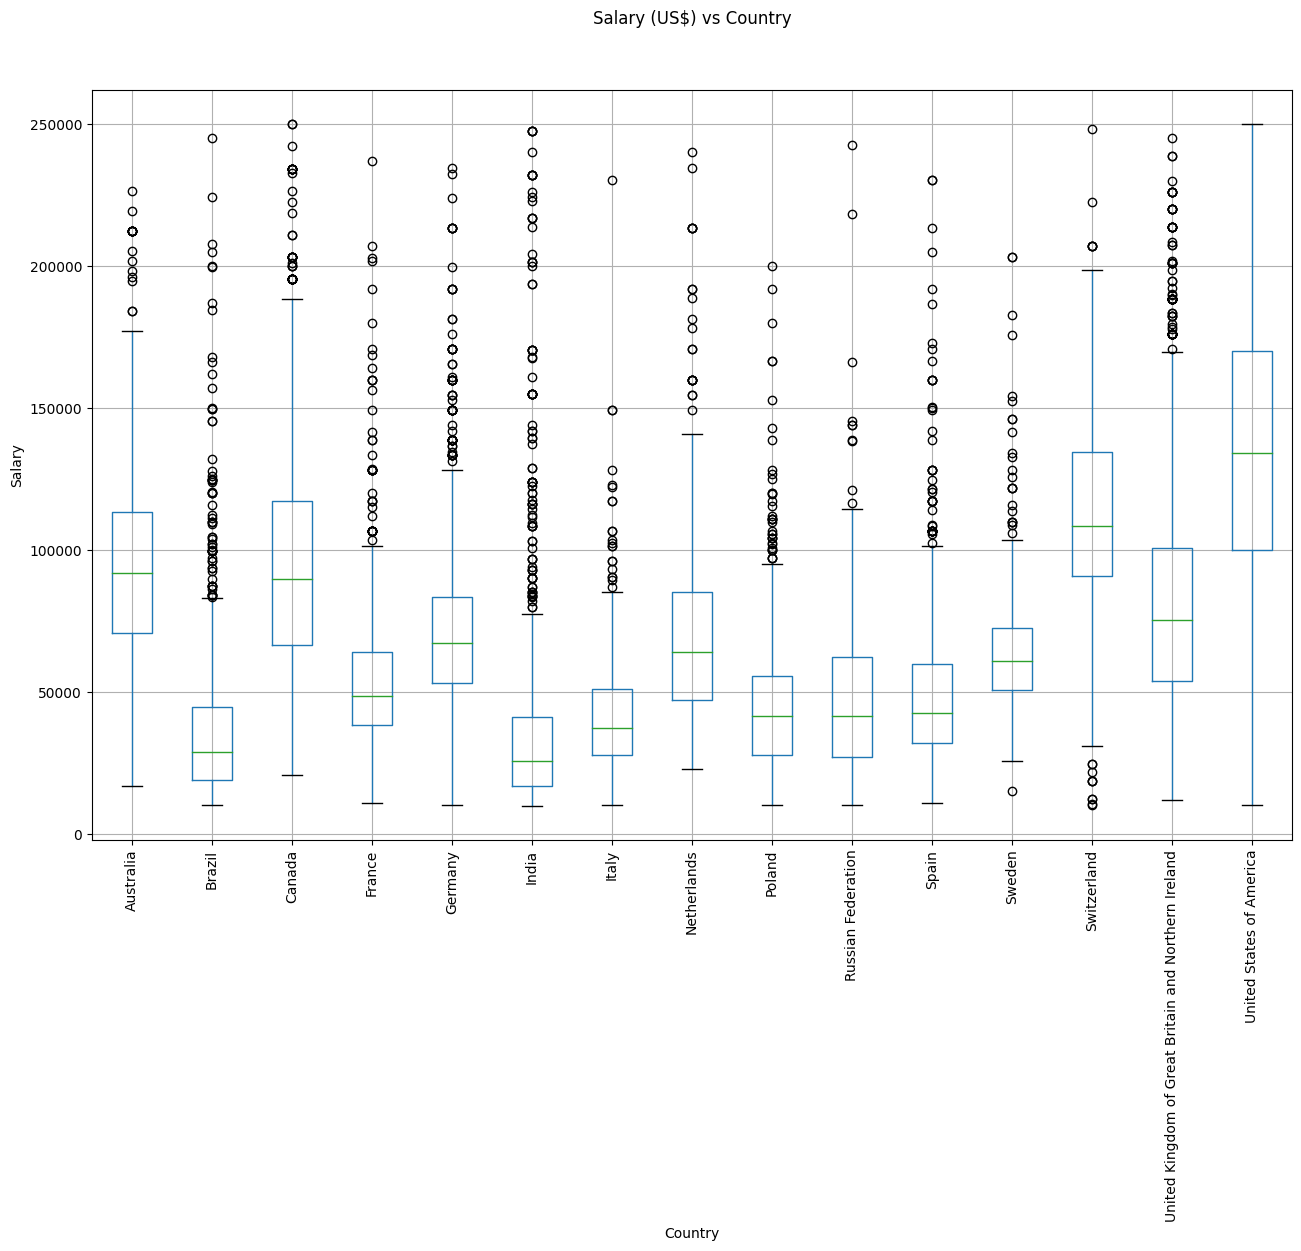

In [87]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
data.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [88]:
data['YearsCodePro'].unique()

array(['5', '6', '2', '4', '20', '9', '14', '21', '15', '25', '3', '10',
       '8', '12', '7', '19', '17', '24', '1', '11', '23',
       'Less than 1 year', '18', '37', '46', '22', '32', '13', '27', '28',
       '16', '31', '34', '35', '26', '42', '38', '30', '36', '40', '41',
       '29', '33', '39', '48', '45', '44', '43', 'More than 50 years',
       '47', '49', '50'], dtype=object)

In [90]:
def clean_experiance(x):
    if x == 'More than 50 years':
        return 50
    elif x == 'Less than 1 year':
        return 0.5
    return float(x)



In [91]:
data['YearsCodePro'] = data['YearsCodePro'].apply(clean_experiance)

In [89]:
data['EdLevel'].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Something else',
       'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school'], dtype=object)

In [92]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return "Master's Degree"
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'less than bachelors'

In [93]:
data['EdLevel'] = data['EdLevel'].apply(clean_education)

In [94]:
data['EdLevel'].unique()

array(["Master's Degree", 'Bachelor’s degree', 'less than bachelors',
       'Post grad'], dtype=object)

In [96]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
data['EdLevel'] = le_education.fit_transform(data['EdLevel'])

In [97]:
data['EdLevel'].unique()

array([1, 0, 3, 2])

In [98]:
le_country = LabelEncoder()
data['Country'] = le_country.fit_transform(data['Country'])
data['Country'].unique()

array([13,  7, 14,  6,  2,  4,  8,  3,  1, 11, 10,  5, 12,  0,  9])

In [104]:
X = data.drop('Salary', axis=1)
y = data['Salary']

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [108]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train.values)

LinearRegression()

In [109]:
y_pred = lin_reg.predict(X_test)

In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
error = np.sqrt(mean_squared_error(y_test, y_pred))

In [111]:
error

44785.029051573336

In [112]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train.values)

DecisionTreeRegressor(random_state=0)

In [113]:
tree_pred = tree_reg.predict(X_test)

In [115]:
tree_error = np.sqrt(mean_squared_error(y_test, tree_pred))

In [116]:
tree_error

37062.36646458063

In [117]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=0)
forest_reg.fit(X_train, y_train.values)

RandomForestRegressor(random_state=0)

In [118]:
forest_pred = forest_reg.predict(X_test)

In [119]:
forest_error = np.sqrt(mean_squared_error(y_test, forest_pred))

In [120]:
forest_error

36493.15033230204

In [121]:
from sklearn.model_selection import GridSearchCV


regressor = DecisionTreeRegressor(random_state=0)
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
            "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
            "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
            "max_features":["auto","log2","sqrt",None],
            "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

tuning_model=GridSearchCV(regressor, param_grid=parameters, scoring='neg_mean_squared_error', cv=5, verbose=3)

In [159]:
# tuning_model.fit(X_train, y_train.values)

In [123]:
tuning_model.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [125]:
estimator = tuning_model.best_estimator_

In [160]:
# estimator.fit(X_train, y_train.values)

In [127]:
y_pred = estimator.predict(X_test)

In [128]:
error = np.sqrt(mean_squared_error(y_test, y_pred))
error

39491.848459126224

# Training on new data

In [135]:
X_train

,Country,EdLevel,YearsCodePro
35314,11,1,2.0
65189,8,3,0.5
27863,14,0,9.0
55170,11,3,11.0
43842,4,0,7.0
...,...,...,...
47474,14,3,8.0
72315,13,3,5.0
37281,14,3,10.0
40028,2,0,3.0


In [144]:
X = np.array([['United States of America', 'Bachelor’s degree', 15]])
X

array([['United States of America', 'Bachelor’s degree', '15']],
      dtype='<U24')

In [145]:
X[:,0] = le_country.transform(X[:,0])
X[:,1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[14.,  0., 15.]])

In [162]:
# y_pred = estimator.predict(X)
# y_pred

In [147]:
final_error = np.sqrt(mean_squared_error(y_test, y_pred))

In [148]:
final_error

39491.848459126224

# Save Model

In [149]:
import pickle

In [150]:
model_data = {"model": estimator, "le_country": le_country, "le_education": le_education}
with open('saved_model.pkl', 'wb') as file:
    pickle.dump(model_data, file)

In [151]:
pwd

'/Users/bingobango/code/multiyumz/developer-salaries-pred-model'

In [152]:
with open('saved_model.pkl', 'rb') as file:
    saved_model = pickle.load(file)

In [153]:
regressor_loaded = saved_model['model']
le_country = saved_model['le_country']
le_education = saved_model['le_education']

In [163]:
# new_y_pred = regressor_loaded.predict(X)

In [164]:
new_y_pred

array([152210.94889374])